# Concrete Compressive Strength Prediction With Linear Regression

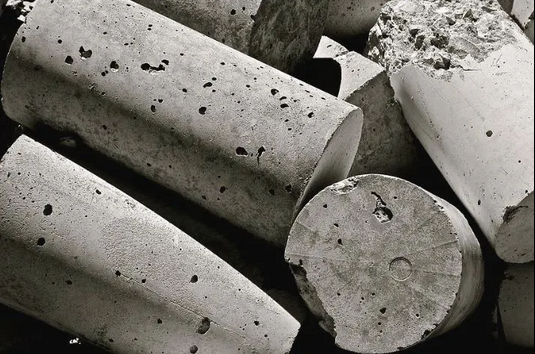

## About Dataset

Abstract: Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
___
Sources: 

  Original Owner and Donor<br>
  Prof. I-Cheng Yeh<br>
  Department of Information Management<br>
  Chung-Hua University,<br> 
  Hsin Chu, Taiwan 30067, R.O.C.<br>
___
  
Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).<br>
___

Variables:

Given is the variable name and the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

Cement (component 1): kg in a m3 mixture <br>
Blast Furnace Slag (component 2): kg in a m3 mixture <br>
Fly Ash (component 3): kg in a m3 mixture <br>
Water (component 4): kg in a m3 mixture <br>
Superplasticizer (component 5): kg in a m3 mixture <br>
Coarse Aggregate (component 6): kg in a m3 mixture <br>
Fine Aggregate (component 7): kg in a m3 mixture <br>
Age: Day (1~365) <br>
Concrete compressive strength: MPa (N/mm2) <br>
___


Acknowledgements, Copyright Information, and Availability:

NOTE: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)
___

**Task: First we will build a regression model with raw data and take evaluation metrics, then we will work on feature engineering and data preprocessing to improve the model.**

**Import Libraries**

In [1413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

**Read csv file**

In [1414]:
df_ = pd.read_excel('Concrete_Data.xls')

In [1415]:
df = df_.copy()

In [1416]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.053
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.296


**Change columns name**

In [1417]:
df.columns = [col.split('(')[0].strip().lower() for col in df.columns]
df.columns = ['_'.join(col.split()) for col in df.columns]

In [1418]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.053
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.296


## Exploratory Data Analysis

In [1419]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.053
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.296
...,...,...,...,...,...,...,...,...,...
1025,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.284
1026,322.200,0.000,115.600,196.000,10.400,817.900,813.400,28,31.179
1027,148.500,139.400,108.600,192.700,6.100,892.400,780.000,28,23.697
1028,159.100,186.700,0.000,175.600,11.300,989.600,788.900,28,32.768


**Info**

In [1420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Check missing value**

In [1421]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

**Summarize the variables**

In [1422]:
df.columns.tolist()

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'concrete_compressive_strength']

In [1423]:
def num_summary(dataframe, numerical_col, plot=False):
    print(dataframe[[numerical_col]].describe().T)
    
    if plot:
        plt.figure(figsize=(6, 3))
        sns.histplot(data=dataframe, x=col)
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()
       
    print(120*'#', '\n')

          count    mean     std     min     25%     50%     75%     max
cement 1030.000 281.166 104.507 102.000 192.375 272.900 350.000 540.000


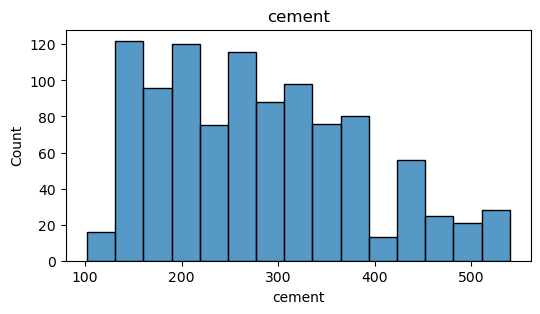

######################################################################################################################## 

                      count   mean    std   min   25%    50%     75%     max
blast_furnace_slag 1030.000 73.895 86.279 0.000 0.000 22.000 142.950 359.400


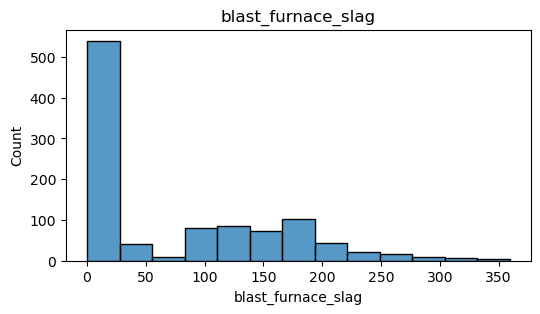

######################################################################################################################## 

           count   mean    std   min   25%   50%     75%     max
fly_ash 1030.000 54.187 63.996 0.000 0.000 0.000 118.270 200.100


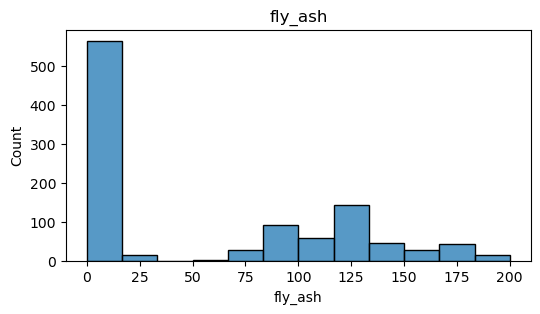

######################################################################################################################## 

         count    mean    std     min     25%     50%     75%     max
water 1030.000 181.566 21.356 121.750 164.900 185.000 192.000 247.000


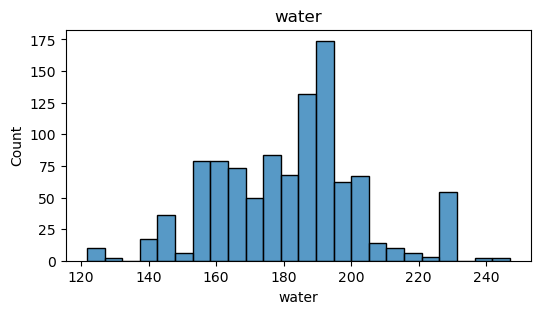

######################################################################################################################## 

                    count  mean   std   min   25%   50%    75%    max
superplasticizer 1030.000 6.203 5.973 0.000 0.000 6.350 10.160 32.200


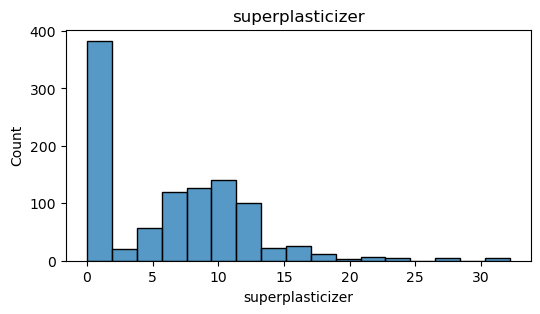

######################################################################################################################## 

                    count    mean    std     min     25%     50%      75%  \
coarse_aggregate 1030.000 972.919 77.754 801.000 932.000 968.000 1029.400   

                      max  
coarse_aggregate 1145.000  


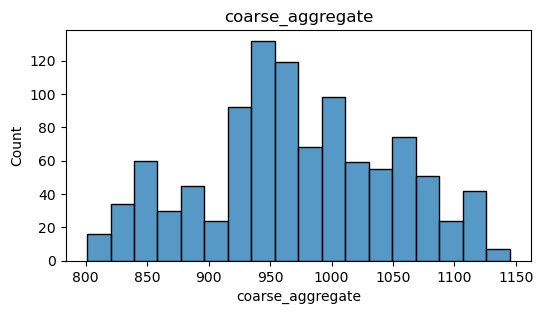

######################################################################################################################## 

                  count    mean    std     min     25%     50%     75%     max
fine_aggregate 1030.000 773.579 80.175 594.000 730.950 779.510 824.000 992.600


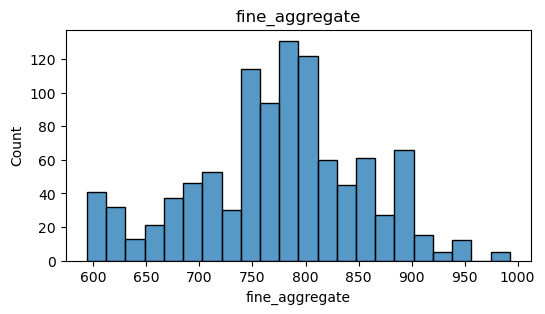

######################################################################################################################## 

       count   mean    std   min   25%    50%    75%     max
age 1030.000 45.662 63.170 1.000 7.000 28.000 56.000 365.000


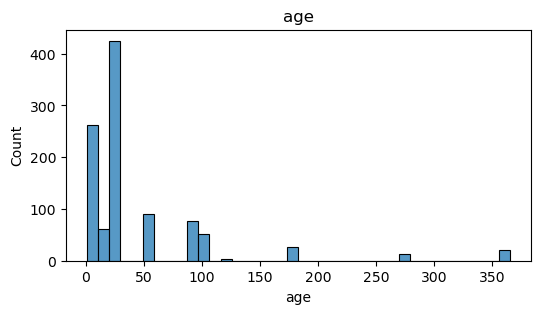

######################################################################################################################## 

                                 count   mean    std   min    25%    50%  \
concrete_compressive_strength 1030.000 35.818 16.706 2.332 23.707 34.443   

                                 75%    max  
concrete_compressive_strength 46.136 82.599  


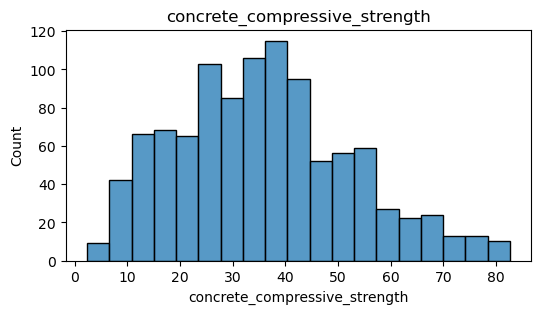

######################################################################################################################## 



In [1424]:
for col in df.columns:
    num_summary(df, col, plot=True)

In [1425]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.053
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.296


**Check the correlation**

In [1426]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000,-0.275,-0.397,-0.082,0.093,-0.109,-0.223,0.082,0.498
blast_furnace_slag,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
fly_ash,-0.397,-0.324,1.000,-0.257,0.377,-0.010,0.079,-0.154,-0.106
water,-0.082,0.107,-0.257,1.000,-0.657,-0.182,-0.451,0.278,-0.290
superplasticizer,0.093,0.043,0.377,-0.657,1.000,-0.266,0.223,-0.193,0.366
coarse_aggregate,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.179,-0.003,-0.165
fine_aggregate,-0.223,-0.282,0.079,-0.451,0.223,-0.179,1.000,-0.156,-0.167
age,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
concrete_compressive_strength,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


<AxesSubplot:>

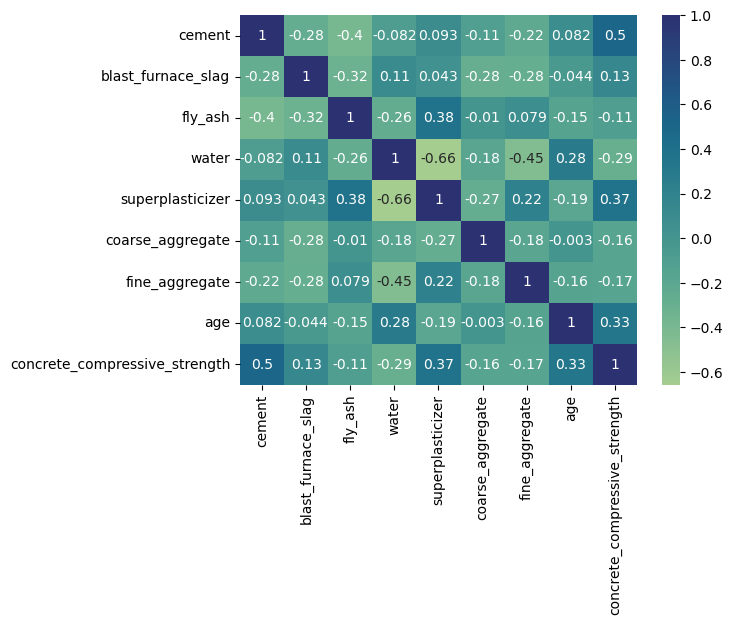

In [1427]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

**Pairplot**

In [1428]:
# sns.pairplot(df, kind='reg')

## First, we will create a regression model with raw data and get the evualtion metrics, and then we will work on feature engineering and datapreprocessing and try to improve our model.

**Feature and Label**

In [1429]:
X = df.drop('concrete_compressive_strength', axis=1)
y = df[['concrete_compressive_strength']]

**Train and test split**

In [1430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Create model and get the intercept and coefficients**

In [1431]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [1432]:
reg_model.intercept_

array([-13.1922513])

In [1433]:
reg_model.coef_

array([[ 0.12197049,  0.1052257 ,  0.08730898, -0.15515141,  0.3302038 ,
         0.01252671,  0.01432804,  0.11555371]])

In [1434]:
pd.DataFrame(reg_model.coef_.reshape(8), X.columns, columns=['coefficients'])

,coefficients
cement,0.122
blast_furnace_slag,0.105
fly_ash,0.087
water,-0.155
superplasticizer,0.330
coarse_aggregate,0.013
fine_aggregate,0.014
age,0.116


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Train set evaulation

In [1435]:
y_predictions_train = reg_model.predict(X_train)

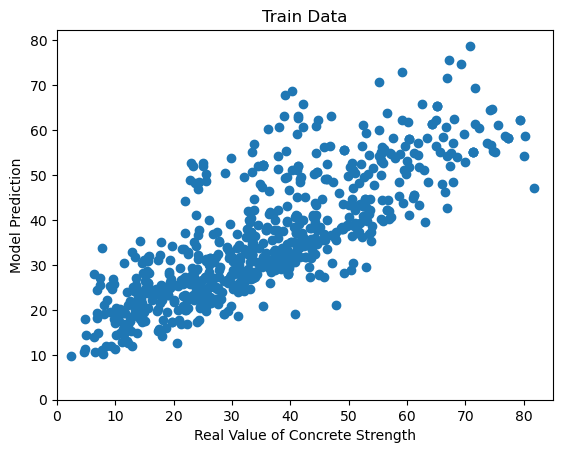

In [1436]:
plt.scatter(y_train, y_predictions_train)
plt.title('Train Data')
plt.xlabel('Real Value of Concrete Strength')
plt.ylabel('Model Prediction')
plt.xlim(0, 85)
plt.ylim(bottom=0)
plt.show()

In [1437]:
df[['concrete_compressive_strength']].describe().T

,count,mean,std,min,25%,50%,75%,max
concrete_compressive_strength,1030.000,35.818,16.706,2.332,23.707,34.443,46.136,82.599


**Train Data Mean Squarred Error (MSE)**

In [1438]:
mean_squared_error(y_train, y_predictions_train)

102.54784585315682

**Train Data Root Mean Squarred Error(RMSE)**

In [1439]:
np.sqrt(mean_squared_error(y_train, y_predictions_train))

10.126591028236344

**Train Data Mean Absolute Error (MAE)**

In [1440]:
mean_absolute_error(y_train, y_predictions_train)

7.990073185350362

**Train Data Regression Score**

In [1441]:
reg_model.score(X_train, y_train)

0.6411304739211958

### Test set evaulation

In [1442]:
y_predictions_test = reg_model.predict(X_test)

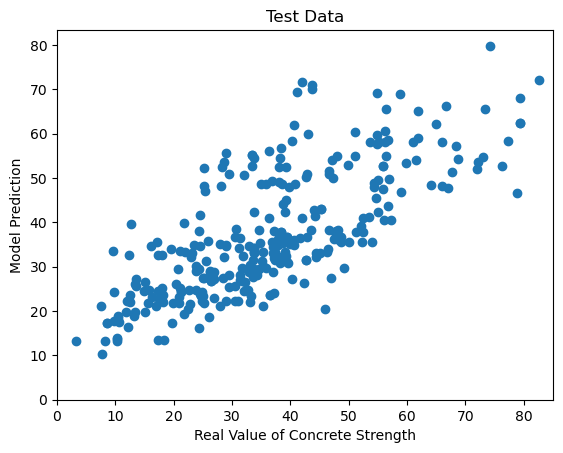

In [1443]:
plt.scatter(y_test, y_predictions_test)
plt.title('Test Data')
plt.xlabel('Real Value of Concrete Strength')
plt.ylabel('Model Prediction')
plt.xlim(0, 85)
plt.ylim(bottom=0)
plt.show()

**Test Data Mean Squarred Error(MSE)**

In [1444]:
mean_squared_error(y_test, y_predictions_test)

120.19296189135144

**Test Data Root Mean Squarred Error(RMSE)**

In [1445]:
np.sqrt(mean_squared_error(y_test, y_predictions_test))

10.96325507736418

**Test Data Mean Absolute Error (MAE)**

In [1446]:
mean_absolute_error(y_test, y_predictions_test)

8.712005247442644

**Test Data Regression Score**

In [1447]:
reg_model.score(X_test, y_test)

0.5414363184391054

### K-Fold Cross Validation

In [1448]:
np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=5, scoring='neg_mean_squared_error')))

11.132645359020266

## Feature Engineering and Data Preprocessing

### Outlier Analysis

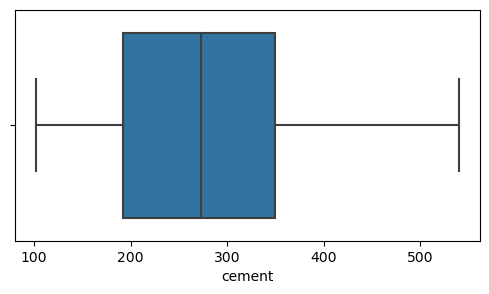

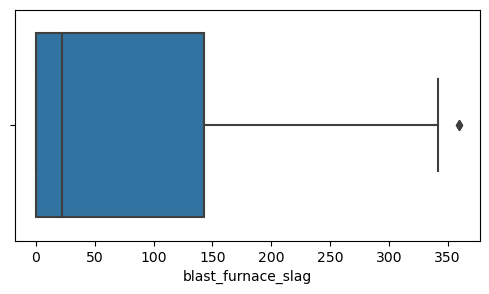

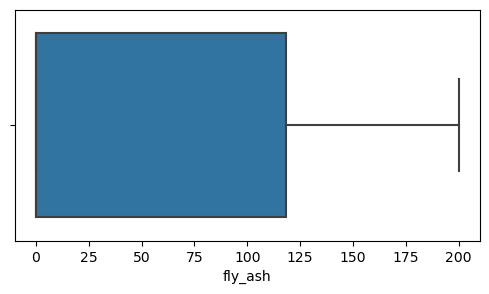

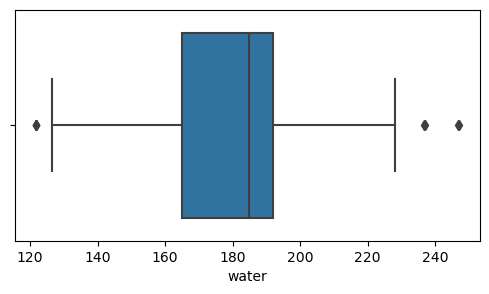

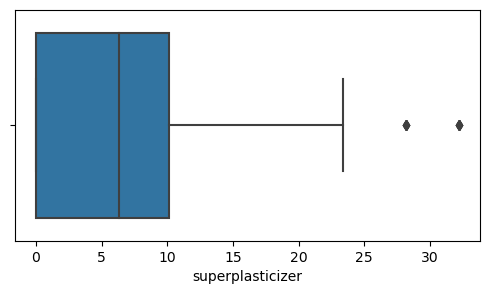

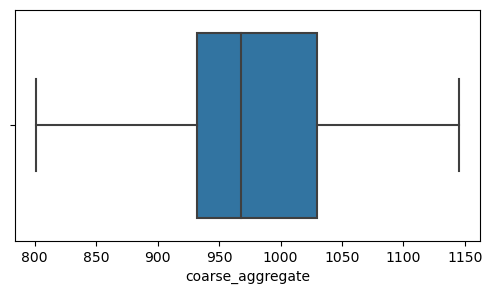

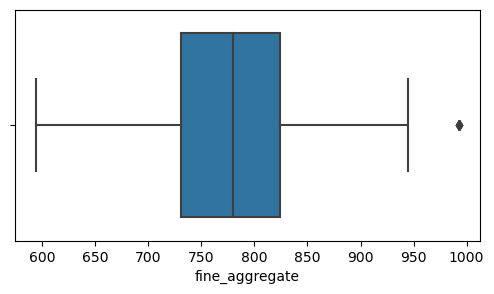

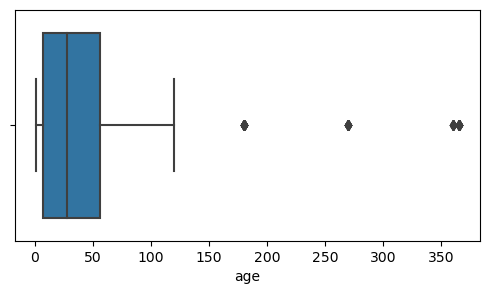

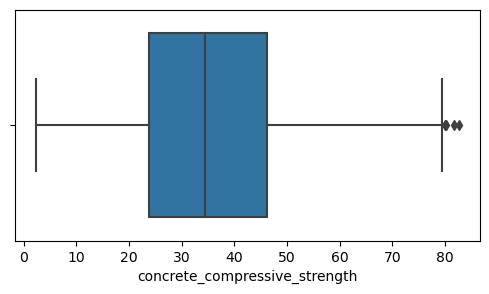

In [1449]:
for col in df.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.show()

In [1450]:
def outlier_threshold(dataframe, col_name, q1=0.25, q3=0.75):
    
    quartile_1 = dataframe[col_name].quantile(q1)
    quartile_3 = dataframe[col_name].quantile(q3)
    interquartile = quartile_3 - quartile_1
    low_limit = quartile_1 - 1.5 * interquartile
    up_limit = quartile_3 + 1.5 * interquartile
    
    return up_limit, low_limit

In [1451]:
def check_outlier(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [1452]:
for col in df.columns:
    print(col, check_outlier(df, col))

cement False
blast_furnace_slag True
fly_ash False
water True
superplasticizer True
coarse_aggregate False
fine_aggregate True
age True
concrete_compressive_strength True


**Replace Outliers**

In [1453]:
def replace_thresholds(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
    dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit

In [1454]:
for col in df.columns:
    replace_thresholds(df, col)

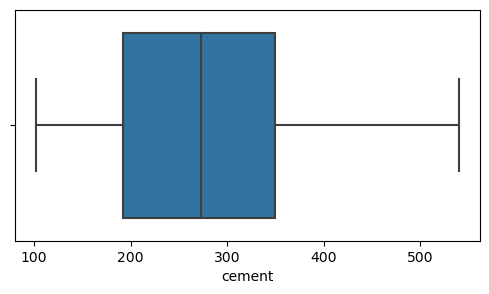

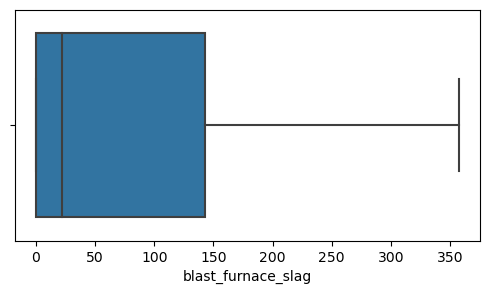

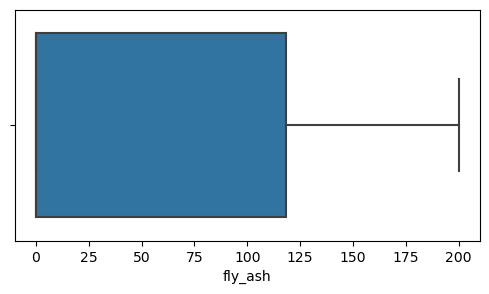

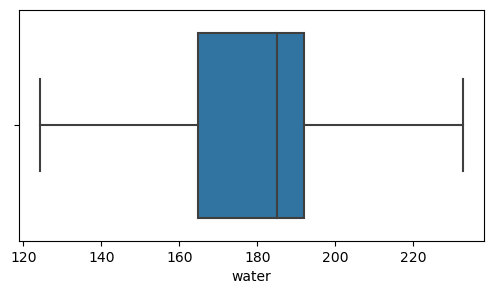

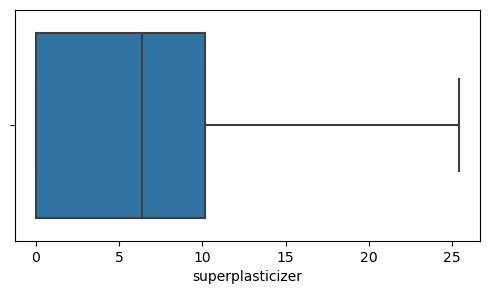

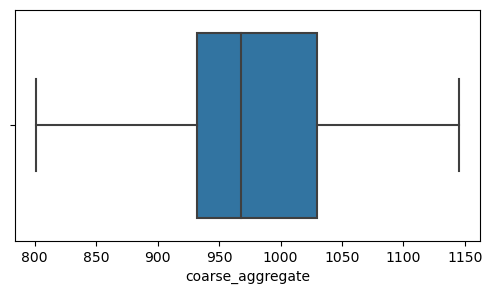

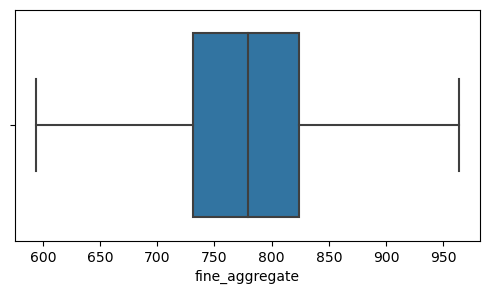

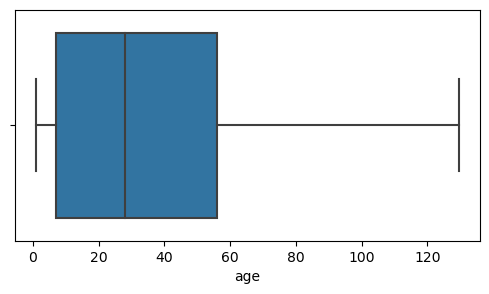

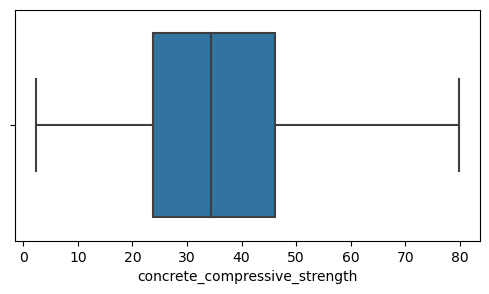

In [1455]:
for col in df.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.show()

### Add New Feature

#### 1) Porosity
Porosity is a measure of the volume of voids in concrete.<br>
1 m3 concrete = 2500 kg<br>
porosity = 2500 - all_materials<br>

In [1456]:
df['porosity'] = 2500 - df.drop(['concrete_compressive_strength', 'age'], axis=1).sum(axis=1)

In [1457]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,porosity
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28.000,79.780,79.500
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28.000,61.887,64.500
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,40.270,271.000
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,41.053,271.000
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,129.500,44.296,173.100
...,...,...,...,...,...,...,...,...,...,...
1025,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28.000,44.284,190.400
1026,322.200,0.000,115.600,196.000,10.400,817.900,813.400,28.000,31.179,224.500
1027,148.500,139.400,108.600,192.700,6.100,892.400,780.000,28.000,23.697,232.300
1028,159.100,186.700,0.000,175.600,11.300,989.600,788.900,28.000,32.768,188.800


<AxesSubplot:xlabel='porosity'>

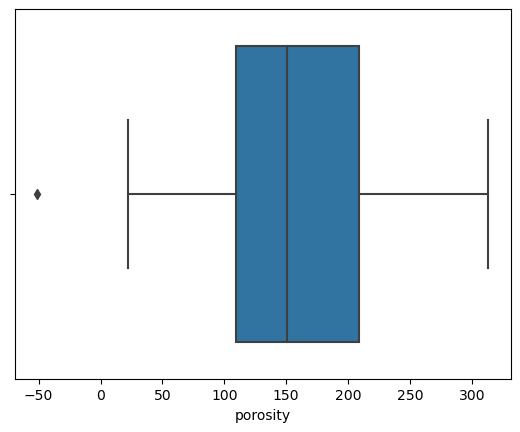

In [1458]:
sns.boxplot(data=df, x='porosity')

**Replace thresold outliers**

In [1459]:
replace_thresholds(df, 'porosity')

<AxesSubplot:xlabel='porosity'>

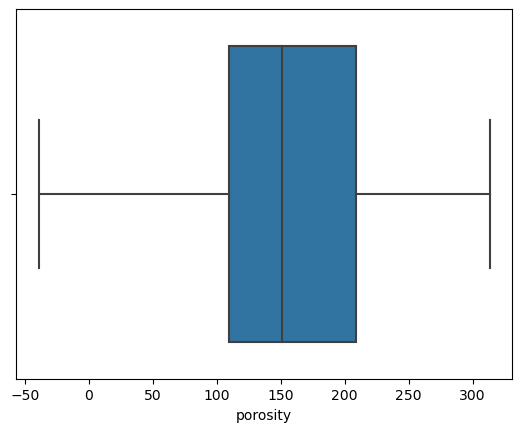

In [1460]:
sns.boxplot(data=df, x='porosity')

In [1461]:
df = df[df['porosity'] >= 0]

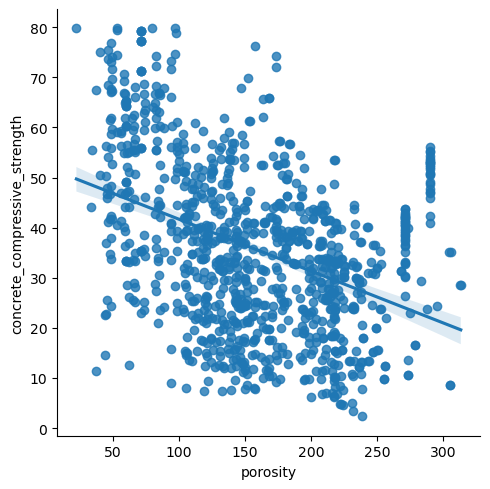

In [1462]:
sns.lmplot(x='porosity', y='concrete_compressive_strength', data=df)

#### 2) Water cement ratio
Ratio of water and cement<br>
ratio = water / cement

In [1463]:
df['water/cement'] = df['water'] / df['cement']

In [1464]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,porosity,water/cement
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28.000,79.780,79.500,0.300
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28.000,61.887,64.500,0.300
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,40.270,271.000,0.686
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,41.053,271.000,0.686
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,129.500,44.296,173.100,0.967


<AxesSubplot:xlabel='water/cement'>

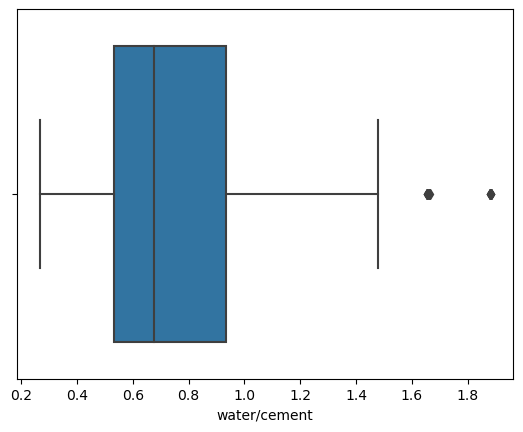

In [1465]:
sns.boxplot(data=df, x='water/cement')

In [1466]:
replace_thresholds(df, 'water/cement')

<AxesSubplot:xlabel='water/cement'>

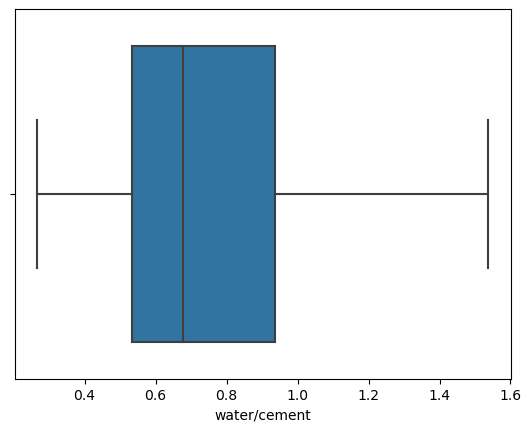

In [1467]:
sns.boxplot(data=df, x='water/cement')

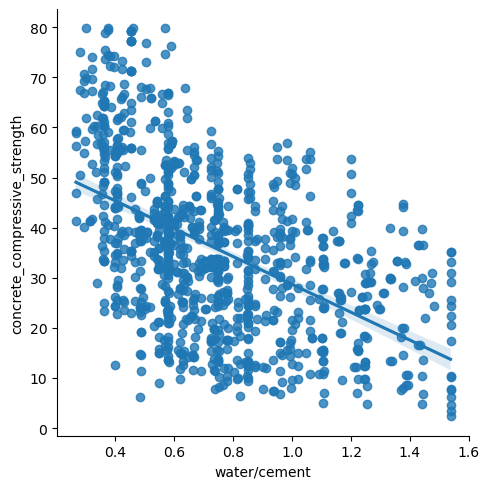

In [1468]:
sns.lmplot(x='water/cement', y='concrete_compressive_strength', data=df)

In [1469]:
df['agrega_ratio'] = (df['coarse_aggregate'] + df['fine_aggregate']) / df.drop(['age', 'concrete_compressive_strength', 'porosity', 'water/cement'], axis=1).sum(axis=1)

<AxesSubplot:xlabel='agrega_ratio'>

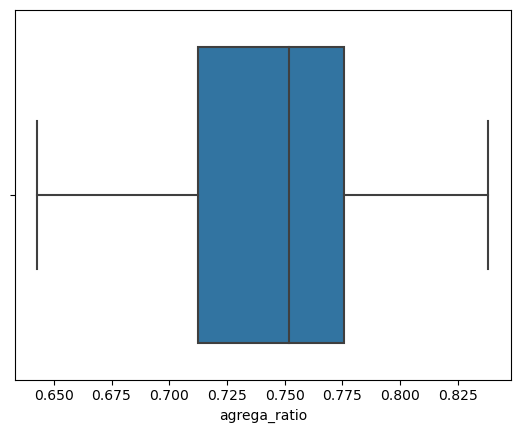

In [1470]:
sns.boxplot(data=df, x='agrega_ratio')

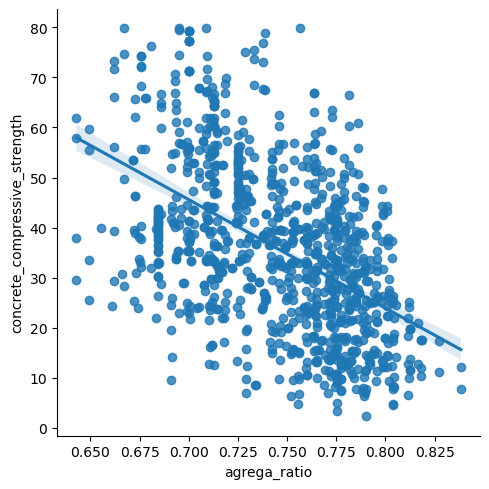

In [1471]:
sns.lmplot(x='agrega_ratio', y='concrete_compressive_strength', data=df)

In [1472]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,porosity,water/cement,agrega_ratio
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28.000,79.780,79.500,0.300,0.709
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28.000,61.887,64.500,0.300,0.711
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,40.270,271.000,0.686,0.685
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,41.053,271.000,0.686,0.685
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,129.500,44.296,173.100,0.967,0.775


In [1473]:
def linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_predictions_train = reg_model.predict(X_train)
    y_predictions_test = reg_model.predict(X_test)
    
    print(120*'-')
    print('Train Data Set')
    print('MAE:', mean_absolute_error(y_train, y_predictions_train))
    print('MSE:', mean_squared_error(y_train, y_predictions_train))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_predictions_train)))
    print('Model Score:', reg_model.score(X_train, y_train)) 
    
    print(120*'-')
    print('Test Data Set')
    print('MAE:', mean_absolute_error(y_test, y_predictions_test))
    print('MSE:', mean_squared_error(y_test, y_predictions_test))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predictions_test)))
    print('Model Score:', reg_model.score(X_test, y_test))
    
    print(120*'-')
    print('K-Fold Cross Validation:', 
          np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=5, scoring='neg_mean_squared_error')))) 
    print(120*'-')

In [1474]:
df['cement/agrega'] = df['cement'] / (df['coarse_aggregate'] + df['fine_aggregate'])

In [1475]:
X_2 = df.drop('concrete_compressive_strength', axis=1)
y_2 = df[['concrete_compressive_strength']]

<AxesSubplot:xlabel='cement/agrega'>

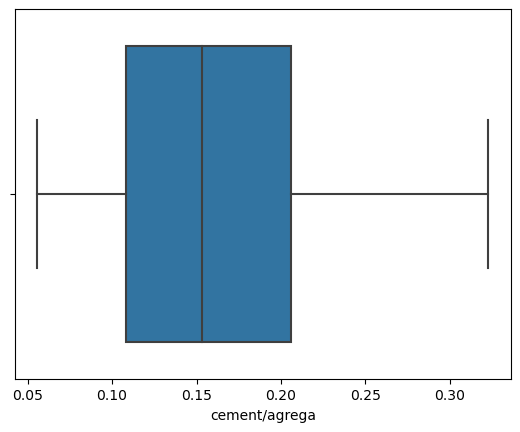

In [1476]:
sns.boxplot(data=df, x='cement/agrega')

In [1477]:
linear_regression(X_2, y_2)

------------------------------------------------------------------------------------------------------------------------
Train Data Set
MAE: 6.4162821813115976
MSE: 69.93419869675304
RMSE: 8.362666960769934
Model Score: 0.7503840241772299
------------------------------------------------------------------------------------------------------------------------
Test Data Set
MAE: 7.118876496632418
MSE: 85.4166685911341
RMSE: 9.24211385945521
Model Score: 0.6841159567501274
------------------------------------------------------------------------------------------------------------------------
K-Fold Cross Validation: 9.475357860786918
------------------------------------------------------------------------------------------------------------------------


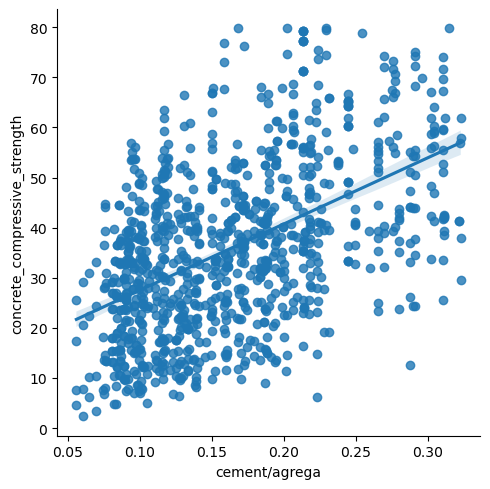

In [1478]:
sns.lmplot(x='cement/agrega', y='concrete_compressive_strength', data=df)

In [1479]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,porosity,water/cement,agrega_ratio,cement/agrega
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28.000,79.780,79.500,0.300,0.709,0.315
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28.000,61.887,64.500,0.300,0.711,0.312
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,40.270,271.000,0.686,0.685,0.218
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,41.053,271.000,0.686,0.685,0.218
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,129.500,44.296,173.100,0.967,0.775,0.110


In [1480]:
df.shape

(1029, 13)

In [1481]:
df.loc[((df['blast_furnace_slag'] == 0) & (df['fly_ash'] == 0) & (df['superplasticizer'] == 0)), 'additive'] = 0

In [1482]:
df.loc[~((df['blast_furnace_slag'] == 0) & (df['fly_ash'] == 0) & (df['superplasticizer'] == 0)), 'additive'] = 1

In [1483]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,porosity,water/cement,agrega_ratio,cement/agrega,additive
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28.000,79.780,79.500,0.300,0.709,0.315,1.000
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28.000,61.887,64.500,0.300,0.711,0.312,1.000
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,40.270,271.000,0.686,0.685,0.218,1.000
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,129.500,41.053,271.000,0.686,0.685,0.218,1.000
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,129.500,44.296,173.100,0.967,0.775,0.110,1.000


In [1484]:
df.groupby('additive').agg({'concrete_compressive_strength': 'mean'})

,concrete_compressive_strength
additive,
0.000,29.603
1.000,37.342


In [1485]:
X_3 = df.drop('concrete_compressive_strength', axis=1)
y_3 = df[['concrete_compressive_strength']]

linear_regression(X_3, y_3)

------------------------------------------------------------------------------------------------------------------------
Train Data Set
MAE: 6.365378619367152
MSE: 68.6600500686291
RMSE: 8.286136015576204
Model Score: 0.7549318399680637
------------------------------------------------------------------------------------------------------------------------
Test Data Set
MAE: 7.0361843042958485
MSE: 83.28178781441031
RMSE: 9.125885590692572
Model Score: 0.6920110758496087
------------------------------------------------------------------------------------------------------------------------
K-Fold Cross Validation: 9.3028362739995
------------------------------------------------------------------------------------------------------------------------


In [1486]:
X_3 = df.drop(['concrete_compressive_strength', 'cement', 'fine_aggregate', 'coarse_aggregate', 'cement/agrega'], axis=1)
y_3 = df[['concrete_compressive_strength']]
linear_regression(X_3, y_3)

------------------------------------------------------------------------------------------------------------------------
Train Data Set
MAE: 6.375092370604157
MSE: 69.20194774509649
RMSE: 8.318770807342663
Model Score: 0.7529976458280259
------------------------------------------------------------------------------------------------------------------------
Test Data Set
MAE: 7.010806521188449
MSE: 82.22236274394442
RMSE: 9.067654754342184
Model Score: 0.6959289935148475
------------------------------------------------------------------------------------------------------------------------
K-Fold Cross Validation: 9.017006886963227
------------------------------------------------------------------------------------------------------------------------
